# Plot graphs automatically
by Yuhang Lin

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from apscheduler.schedulers.background import BackgroundScheduler
import time
import datetime
from plotcpu import plot_cpu

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from apis.getcpuinfo import cpuinfo 

In [3]:
counter = 0
data = []
num_container = 4
for i in range(num_container):
    data.append([])

In [4]:
def get_data():
    cpu_data = cpuinfo()
    for i in range(num_container):
        data[i].append(cpu_data[i])

In [5]:
sched = BackgroundScheduler()
# data is retrieved every 1 second
sched.add_job(get_data, 'interval', seconds=1)
sched.start()
print(datetime.datetime.now())

2019-04-24 22:37:16.394331


In [6]:
len(data[1])

0

In [7]:
def plot_cpu(data):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    t = np.arange(0.01, len(data[0]), 1)
    
    ax1 = plt.subplot(411)
    plt.plot(t, data[0]) # container 0
    # make these tick labels invisible
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    # share x only
    ax2 = plt.subplot(412, sharex=ax1)
    plt.plot(t, data[1]) # container 1
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    ax3 = plt.subplot(413, sharex=ax1)
    plt.plot(t, data[2]) # cotainer 2
    plt.setp(ax3.get_xticklabels(), visible=False)
    ax4 = plt.subplot(414, sharex=ax1)
    plt.plot(t, data[3]) # cotainer 3
    plt.setp(ax4.get_xticklabels(), visible=False)
  
    plt.show()

2019-04-24 23:00:49.564629


ValueError: x and y must have same first dimension, but have shapes (1408,) and (1409,)

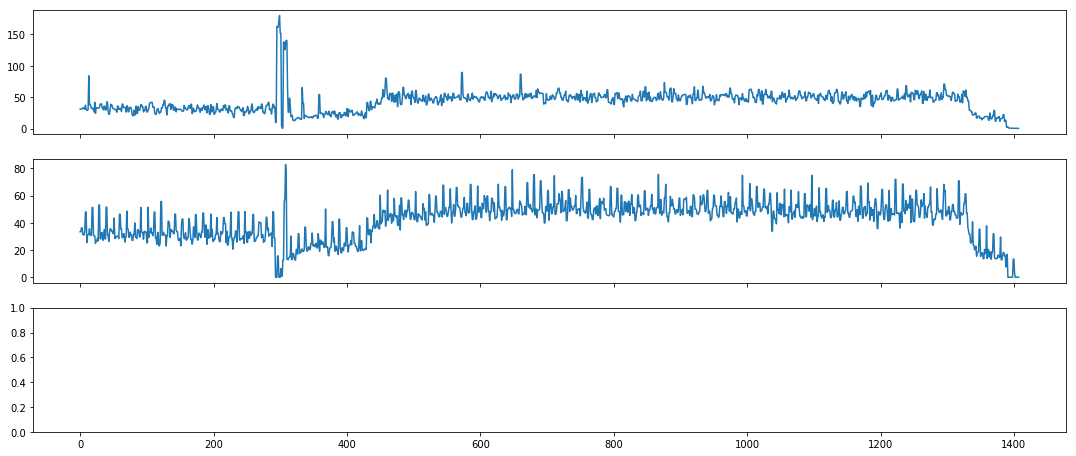

In [32]:
print(datetime.datetime.now())
plot_cpu(data)

2019-04-24 22:55:34.831534


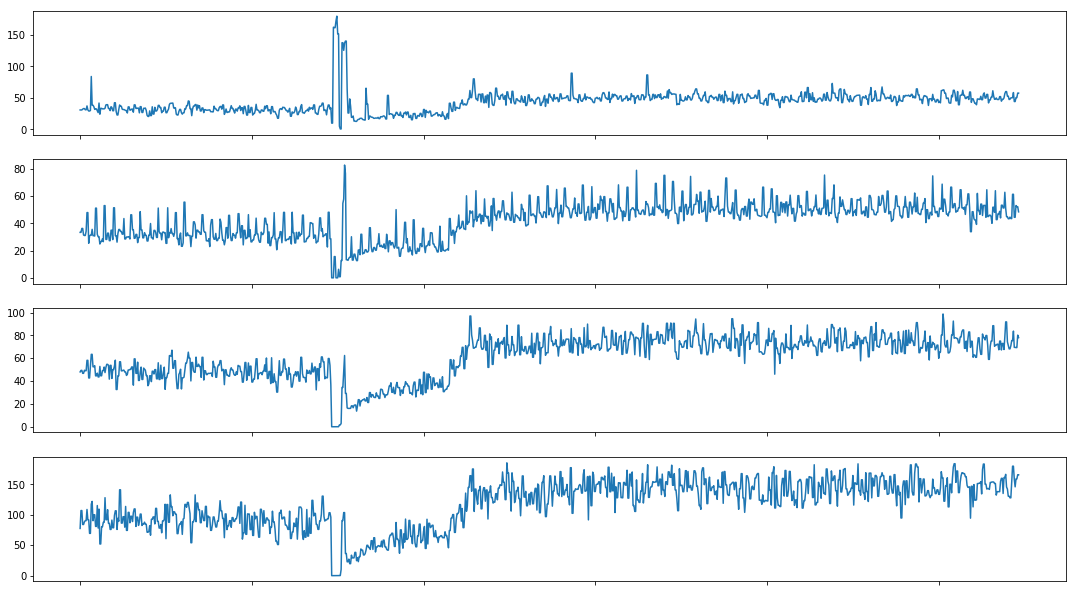

In [31]:
print(datetime.datetime.now())
plot_cpu(data)

In [33]:
sched.shutdown() # shutdown the scheduler

In [34]:
import csv
for i in range(num_container):
    with open("container" + str(i) + ".csv", "w") as file:
        for line in data[i]:
            file.write(str(line))
            file.write('\n')